In [1]:
# this is to visualize the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple, Counter, OrderedDict
df = pd.read_csv("training_set.csv")



In [2]:
list(df)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [3]:
# These predictors are identical

# Quantity and Quantity_group are the same. 
#  df.quantity, df.quantity_group

# Payment and payment type are the same
#  df.payment, df.payment_type

# Waterpoint type is the same as Waterpoint type group except Waterpoint type breaks
#   down waterpoint type group into 2 subcategories 
#   (communal standpipe and communal standpipe multiple).

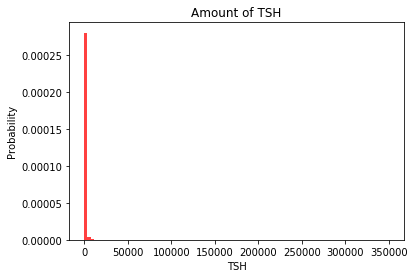

In [4]:
# Continuous variables
#   amount_tsh, longitude, latitude, population
n, bins, patches = plt.hist(df.amount_tsh, 100, density=True, facecolor='r', alpha=0.75)
plt.xlabel('TSH')
plt.ylabel('Probability')
plt.title('Amount of TSH')
plt.show()

In [5]:
# Categorical variables, some of these are either overlapping or identical with another. 
'''
installer - Organization that installed the well - categorical
wpt_name - Name of the waterpoint if there is one - categorical
basin - Geographic water basin - categorical
subvillage - Geographic location - categorical
region - Geographic location - categorical
region_code - Geographic location (coded) - categorical int
district_code - Geographic location (coded) - categorical int 
lga - Geographic location - categorical
ward - Geographic location - categorical
population - Population around the well - continuous
public_meeting - True/False - binary with NA
scheme_management - Who operates the waterpoint - categorical
scheme_name - Who operates the waterpoint - categorical ????
permit - If the waterpoint is permitted - binary with NA
construction_year - Year the waterpoint was constructed - dateyear 
extraction_type - The kind of extraction the waterpoint uses - categorical
extraction_type_group - The kind of extraction the waterpoint uses - categorical
extraction_type_class - The kind of extraction the waterpoint uses - categorical 
management - How the waterpoint is managed - categorical 
management_group - How the waterpoint is managed - categorical 
payment - What the water costs - categorical
payment_type - What the water costs - categorical 
water_quality - The quality of the water - categorical 
quality_group - The quality of the water - categorical 
quantity - The quantity of water - categorical 
quantity_group - The quantity of water - categorical 
source - The source of the water - categorical 
source_type - The source of the water - categorical
source_class - The source of the water - categorical 
waterpoint_type - The kind of waterpoint - categorical 
waterpoint_type_group - The kind of waterpoint - categorical 
'''

def identicalcat(a, b):
    print(df.groupby([a, b]).size())
    if(len(a.unique()) == len(b.unique())):
        print("Same number of categories")
        # Count the unique value pairs. 
    else:
        print("Different number of categories")

identicalcat(df.region, df.region_code)


region         region_code
Arusha         2              3024
               24              326
Dar es Salaam  7               805
Dodoma         1              2201
Iringa         11             5294
Kagera         18             3316
Kigoma         16             2816
Kilimanjaro    3              4379
Lindi          8               300
               18                8
               80             1238
Manyara        21             1583
Mara           20             1969
Mbeya          12             4639
Morogoro       5              4006
Mtwara         9               390
               90              917
               99              423
Mwanza         17               55
               19             3047
Pwani          6              1609
               40                1
               60             1025
Rukwa          15             1808
Ruvuma         10             2640
Shinyanga      11                6
               14               20
               17           

In [6]:
identicalcat(df.quality_group, df.water_quality)

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
dtype: int64
Different number of categories


In [7]:
identicalcat(df.quantity, df.quantity_group)

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64
Same number of categories


In [8]:
df.region.unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [9]:
def chist(catvar, alphalev=1): 
    hist = Counter(catvar)
    hist = OrderedDict(sorted(hist.items()))
    plt.bar(range(len(hist)), hist.values(), alpha=alphalev)
    plt.xticks([i for i in range(len(hist))], hist.keys(), rotation=90)
    plt.xlim([-1, len(hist)]);
    

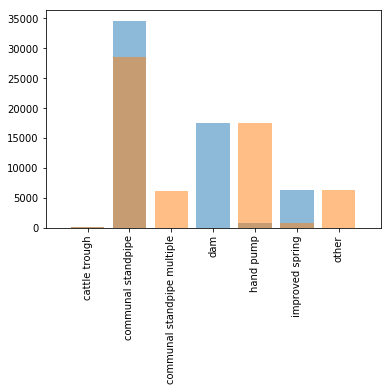

In [10]:
# Waterpoint type and waterpoint type group have a few differences.
chist(df.waterpoint_type_group, 0.5)
chist(df.waterpoint_type, 0.5)


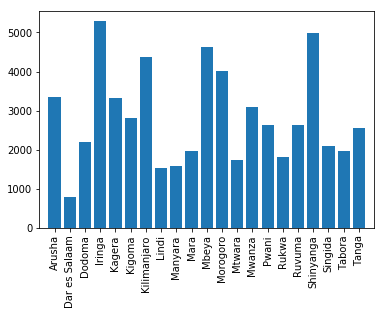

In [11]:
# Distribution of regions
chist(df.region)

In [12]:
df.groupby(['region_code', 'region']).size()

region_code  region       
1            Dodoma           2201
2            Arusha           3024
3            Kilimanjaro      4379
4            Tanga            2513
5            Morogoro         4006
             Tanga              34
6            Pwani            1609
7            Dar es Salaam     805
8            Lindi             300
9            Mtwara            390
10           Ruvuma           2640
11           Iringa           5294
             Shinyanga           6
12           Mbeya            4639
13           Singida          2093
14           Shinyanga          20
             Tabora           1959
15           Rukwa            1808
16           Kigoma           2816
17           Mwanza             55
             Shinyanga        4956
18           Kagera           3316
             Lindi               8
19           Mwanza           3047
20           Mara             1969
21           Manyara          1583
24           Arusha            326
40           Pwani          